In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check the data types of each column
df.info()

# Get basic statistics for numerical columns
df.describe()

# Get basic statistics for categorical columns
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
# List categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows to verify
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
# Columns to one-hot encode
multi_category_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=multi_category_columns)

# Display the first few rows to verify
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


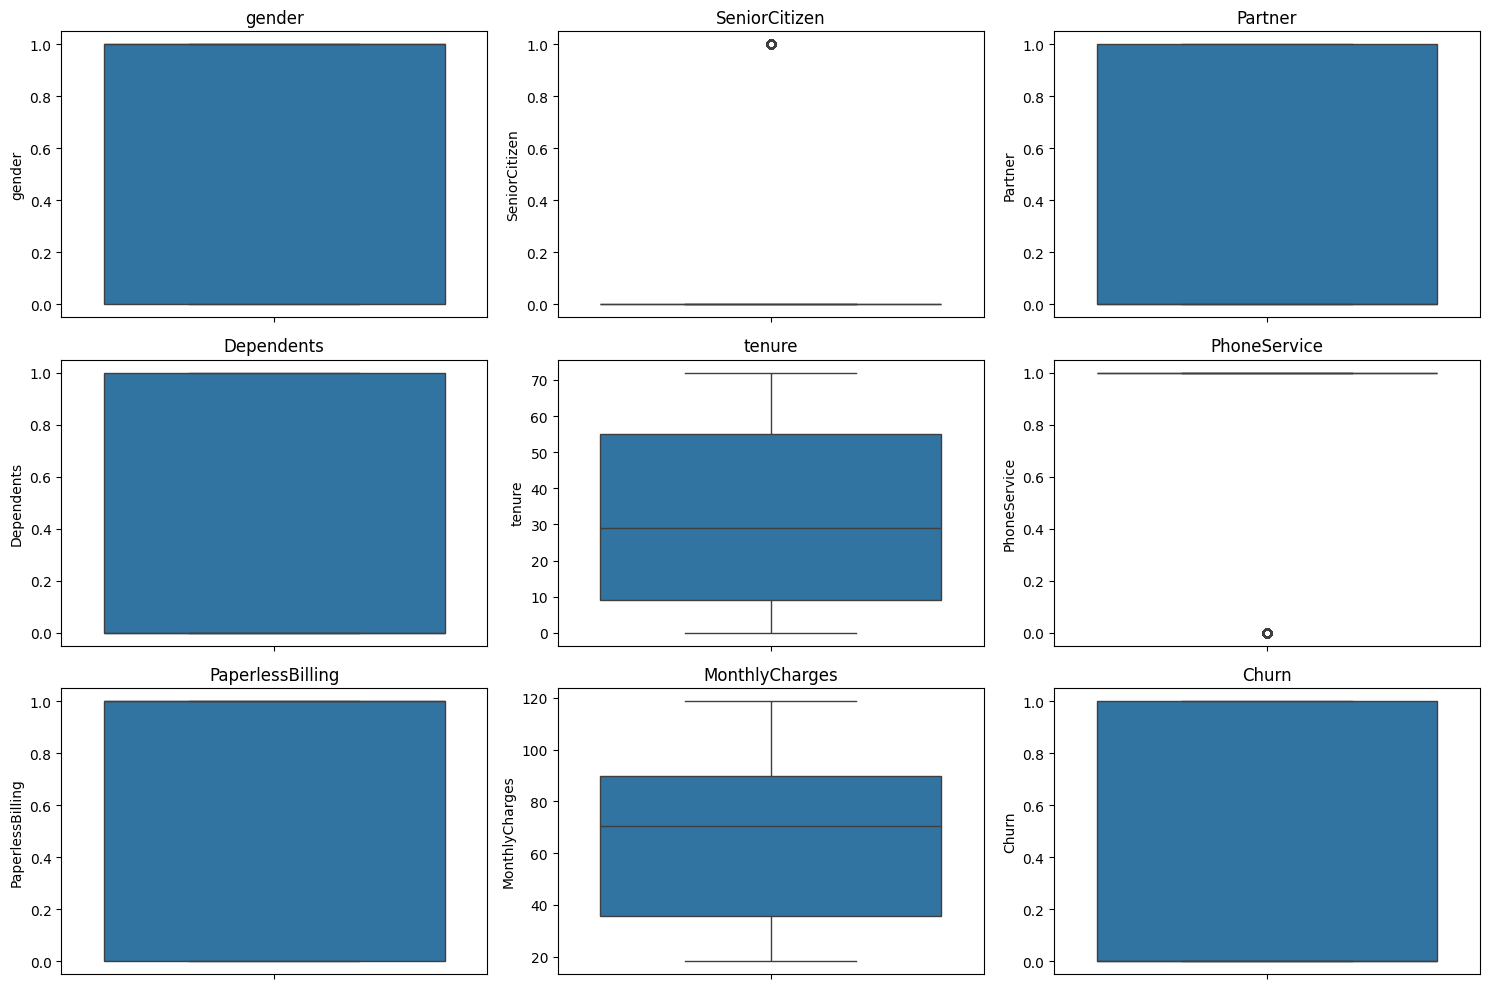

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numerical columns to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Creating tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    elif tenure <= 60:
        return '48-60 Months'
    else:
        return '60+ Months'

df['tenure_group'] = df['tenure'].apply(tenure_group)

# One-hot encode the tenure_group column
df = pd.get_dummies(df, columns=['tenure_group'])

# Display the first few rows to verify
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0-12 Months,tenure_group_12-24 Months,tenure_group_24-48 Months,tenure_group_48-60 Months,tenure_group_60+ Months
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,True,False,True,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,True,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,True,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,True,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,True,False,True,False,False,False,False


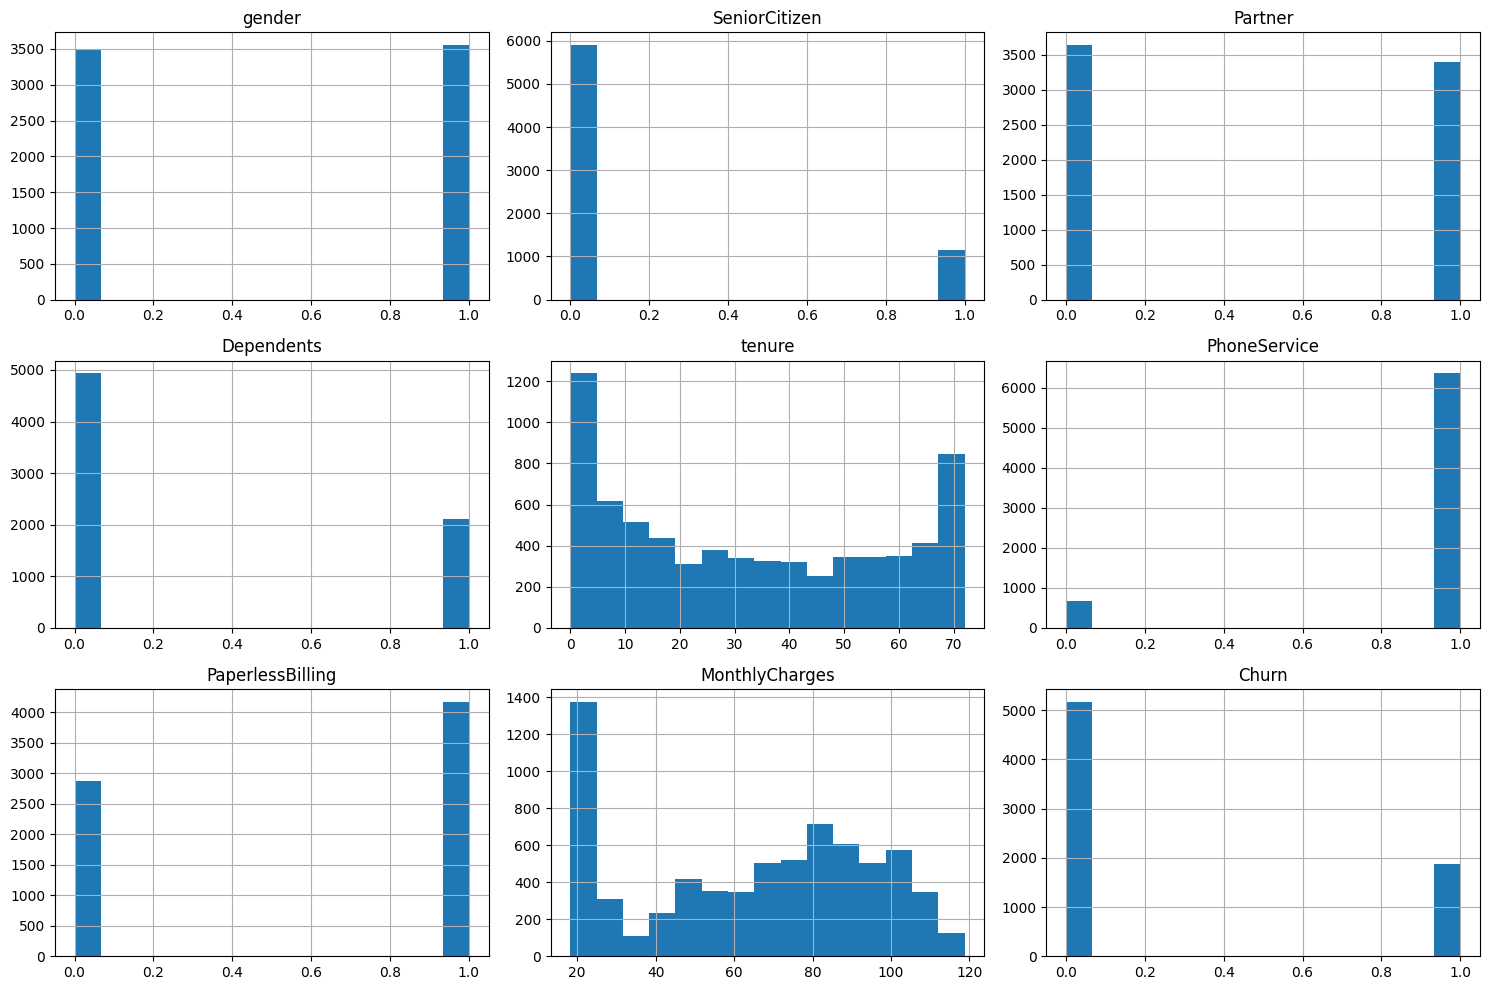

In [ ]:
# Visualize the distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


In [ ]:
# Visualize the distribution of categorical features
categorical_columns = df.select_dtypes(include=['uint8']).columns

plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()


<Figure size 1500x2500 with 0 Axes>

In [ ]:
# # Compute the correlation matrix
# corr = df.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# plt.figure(figsize=(15, 15))

# # Draw the heatmap
# sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
# plt.show()


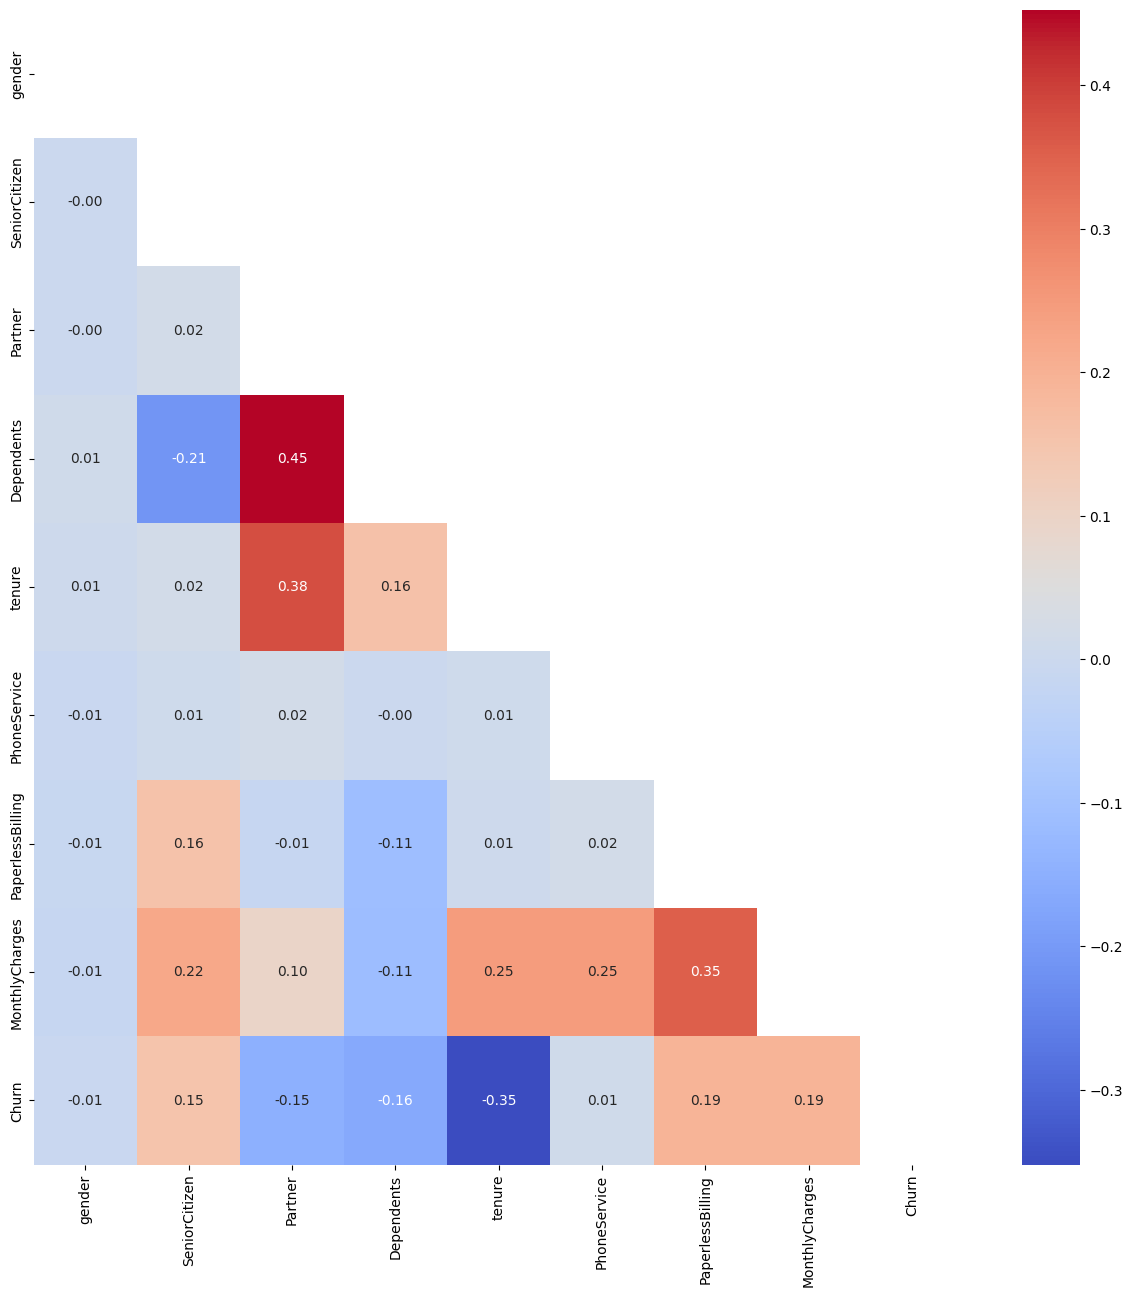

In [ ]:
import numpy as np

# Exclude non-numeric columns before computing the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


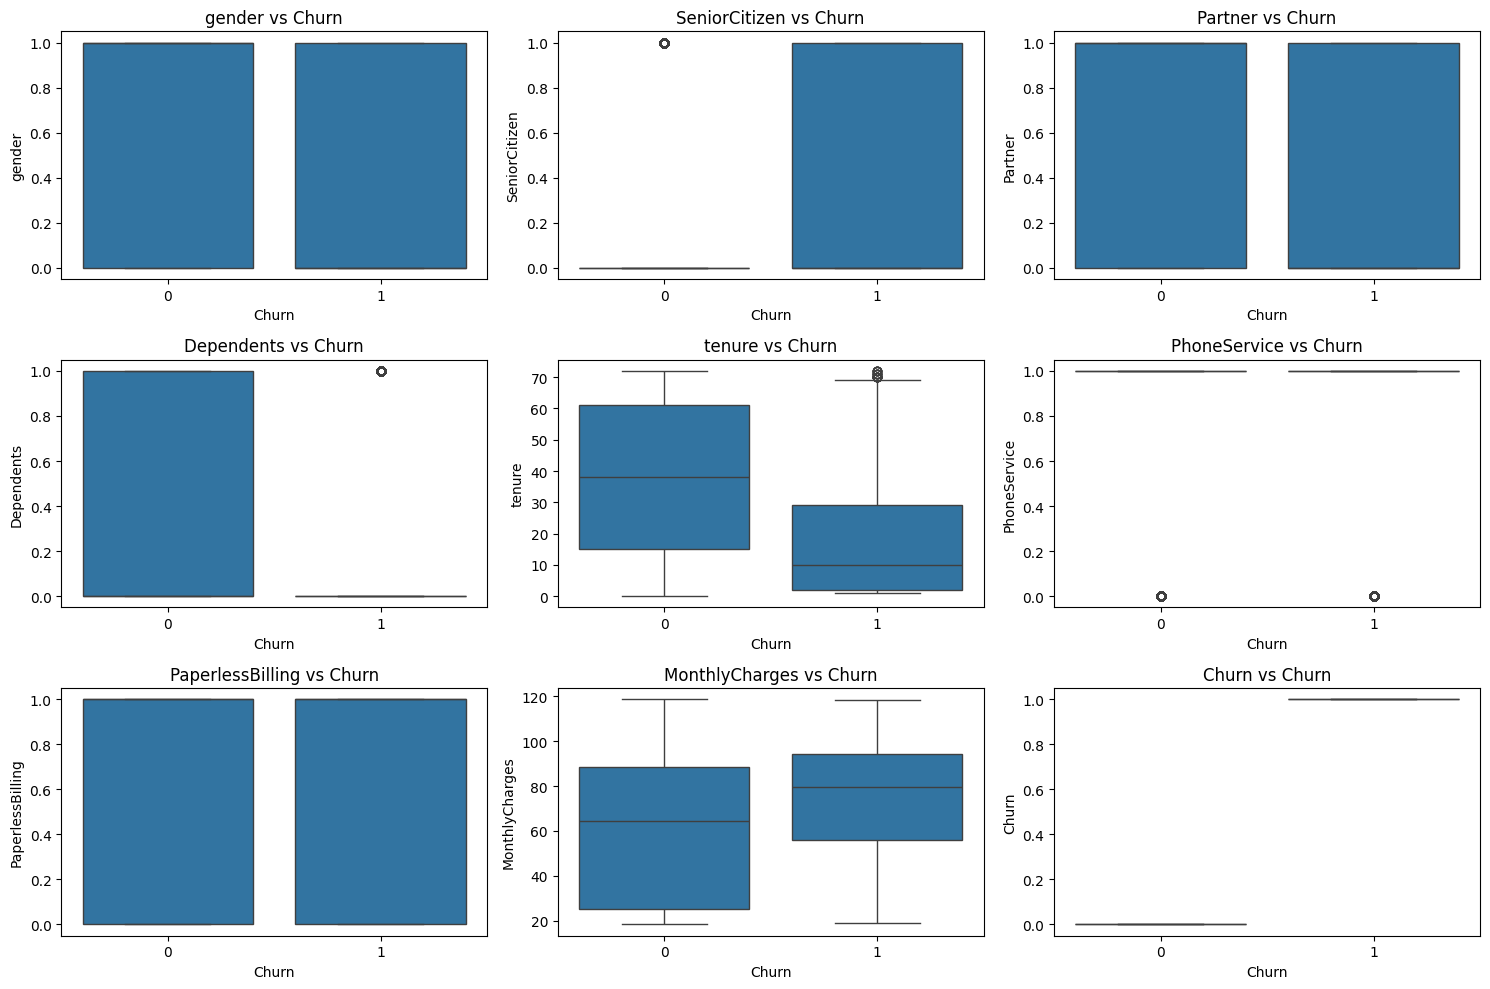

<Figure size 1500x2500 with 0 Axes>

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()


In [ ]:
# model building

In [ ]:
# # Re-create the tenure_group column
# def tenure_group(tenure):
#     if tenure <= 12:
#         return '0-12 Months'
#     elif tenure <= 24:
#         return '12-24 Months'
#     elif tenure <= 48:
#         return '24-48 Months'
#     elif tenure <= 60:
#         return '48-60 Months'
#     else:
#         return '60+ Months'

# df['tenure_group'] = df['tenure'].apply(tenure_group)

# # One-hot encode the tenure_group column
# df = pd.get_dummies(df, columns=['tenure_group'])

# # Display the first few rows to verify
# df.head()

In [ ]:
# Convert "TotalCharges" to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check the data type after conversion
print(df['TotalCharges'].dtype)

float64


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Churn', 'customerID'])  # Exclude 'Churn' and 'customerID' columns
y = df['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# # Initialize models
# logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
# random_forest = RandomForestClassifier(random_state=42)
# xgboost = XGBClassifier(random_state=42)

# # Train the models
# logistic_regression.fit(X_train, y_train)
# random_forest.fit(X_train, y_train)
# xgboost.fit(X_train, y_train)

In [ ]:
df.info()

# Get basic statistics for numerical columns
df.describe()

# Get basic statistics for categorical columns
df.describe(include=['object'])
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7032 non-null   float64
 10  Churn                                    7043 no

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0-12 Months,tenure_group_12-24 Months,tenure_group_24-48 Months,tenure_group_48-60 Months,tenure_group_60+ Months
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,True,False,True,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,True,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,True,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,True,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)



# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the models using the imputed data
logistic_regression.fit(X_train_imputed, y_train)
random_forest.fit(X_train_imputed, y_train)
xgboost.fit(X_train_imputed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, roc_auc

In [ ]:
# Train the models using the imputed data
logistic_regression.fit(X_train_imputed, y_train)
random_forest.fit(X_train_imputed, y_train)
xgboost.fit(X_train_imputed, y_train)

# Evaluate model performance on the imputed data
accuracy_lr, precision_lr, recall_lr, roc_auc_lr = evaluate_model(logistic_regression, X_test_imputed, y_test)
accuracy_rf, precision_rf, recall_rf, roc_auc_rf = evaluate_model(random_forest, X_test_imputed, y_test)
accuracy_xgb, precision_xgb, recall_xgb, roc_auc_xgb = evaluate_model(xgboost, X_test_imputed, y_test)

# Print evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}, ROC-AUC: {roc_auc_lr:.2f}")

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, ROC-AUC: {roc_auc_rf:.2f}")

print("\nXGBoost:")
print(f"Accuracy: {accuracy_xgb:.2f}, Precision: {precision_xgb:.2f}, Recall: {recall_xgb:.2f}, ROC-AUC: {roc_auc_xgb:.2f}")


Logistic Regression:
Accuracy: 0.82, Precision: 0.68, Recall: 0.57, ROC-AUC: 0.74

Random Forest:
Accuracy: 0.80, Precision: 0.66, Recall: 0.47, ROC-AUC: 0.69

XGBoost:
Accuracy: 0.79, Precision: 0.63, Recall: 0.51, ROC-AUC: 0.70


In [ ]:

# Evaluate model performance on the imputed data
accuracy_lr, precision_lr, recall_lr, roc_auc_lr = evaluate_model(logistic_regression, X_test_imputed, y_test)
accuracy_rf, precision_rf, recall_rf, roc_auc_rf = evaluate_model(random_forest, X_test_imputed, y_test)
accuracy_xgb, precision_xgb, recall_xgb, roc_auc_xgb = evaluate_model(xgboost, X_test_imputed, y_test)

# Print evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}, ROC-AUC: {roc_auc_lr:.2f}")

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, ROC-AUC: {roc_auc_rf:.2f}")

print("\nXGBoost:")
print(f"Accuracy: {accuracy_xgb:.2f}, Precision: {precision_xgb:.2f}, Recall: {recall_xgb:.2f}, ROC-AUC: {roc_auc_xgb:.2f}")


Logistic Regression:
Accuracy: 0.82, Precision: 0.68, Recall: 0.57, ROC-AUC: 0.74

Random Forest:
Accuracy: 0.80, Precision: 0.66, Recall: 0.47, ROC-AUC: 0.69

XGBoost:
Accuracy: 0.79, Precision: 0.63, Recall: 0.51, ROC-AUC: 0.70
